In [4]:
import itertools
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob
import math
import time
import json
from itertools import chain

def ImShow(im, size=(13,16)):
    plt.figure(figsize = size)
    plt.imshow(im, 'gray')
    plt.show()

def HistPlot(vals, size=(14,17)):
    plt.figure(figsize = size)
    plt.plot(np.arange(len(vals)), vals)
    plt.show()

In [5]:
dataset_path = r'C:\Users\Yuriy\Dropbox\Project&Practice\HumanDetection\FLIR_Dataset\FLIR_ADAS\video\PreviewData'

dataset_files = [file for file in glob.glob(dataset_path + "//*.jpeg")]

train_dataset = dataset_files

print(len(train_dataset), train_dataset)

4224 ['C:\\Users\\Yuriy\\Dropbox\\Project&Practice\\HumanDetection\\FLIR_Dataset\\FLIR_ADAS\\video\\PreviewData\\FLIR_video_00001.jpeg', 'C:\\Users\\Yuriy\\Dropbox\\Project&Practice\\HumanDetection\\FLIR_Dataset\\FLIR_ADAS\\video\\PreviewData\\FLIR_video_00002.jpeg', 'C:\\Users\\Yuriy\\Dropbox\\Project&Practice\\HumanDetection\\FLIR_Dataset\\FLIR_ADAS\\video\\PreviewData\\FLIR_video_00003.jpeg', 'C:\\Users\\Yuriy\\Dropbox\\Project&Practice\\HumanDetection\\FLIR_Dataset\\FLIR_ADAS\\video\\PreviewData\\FLIR_video_00004.jpeg', 'C:\\Users\\Yuriy\\Dropbox\\Project&Practice\\HumanDetection\\FLIR_Dataset\\FLIR_ADAS\\video\\PreviewData\\FLIR_video_00005.jpeg', 'C:\\Users\\Yuriy\\Dropbox\\Project&Practice\\HumanDetection\\FLIR_Dataset\\FLIR_ADAS\\video\\PreviewData\\FLIR_video_00006.jpeg', 'C:\\Users\\Yuriy\\Dropbox\\Project&Practice\\HumanDetection\\FLIR_Dataset\\FLIR_ADAS\\video\\PreviewData\\FLIR_video_00007.jpeg', 'C:\\Users\\Yuriy\\Dropbox\\Project&Practice\\HumanDetection\\FLIR_Dataset\\F

In [9]:
ann_path = r'C:\Users\Yuriy\Dropbox\Project&Practice\HumanDetection\FLIR_Dataset\FLIR_ADAS\video\Annotations'
ann_dataset = [ann_path + file[-22:-5] + '.json' for file in train_dataset]

ann_data = []
for file in ann_dataset:
    ann_sample = []
    with open(file, "r") as read_file:
        data = json.load(read_file)
        for ann in data['annotation']:
            if ann['category_id'] == str(1):
                ann_sample.append(ann['bbox'])
    ann_data.append(ann_sample)
print(len(ann_data), ann_data)

4224 [[[574, 198, 20, 78], [538, 203, 32, 70]], [[584, 196, 23, 81], [546, 202, 32, 74]], [[594, 197, 23, 82], [554, 203, 34, 72]], [[605, 197, 18, 86], [564, 202, 31, 77]], [[615, 197, 22, 87], [573, 202, 34, 81]], [[589, 201, 35, 81]], [[600, 198, 36, 84]], [[612, 197, 27, 89]], [[625, 195, 14, 69]], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [[300, 224, 6, 14]], [], [], [[513, 227, 7, 22]], [], [[520, 226, 8, 21]], [], [], [], [], [], [], [], [], [], [[583, 226, 8, 22]], [], [], [], [], [], [], 

In [12]:
data = dict(zip(train_dataset, ann_data))
data

{'C:\\Users\\Yuriy\\Dropbox\\Project&Practice\\HumanDetection\\FLIR_Dataset\\FLIR_ADAS\\video\\PreviewData\\FLIR_video_00001.jpeg': [[574,
   198,
   20,
   78],
  [538, 203, 32, 70]],
 'C:\\Users\\Yuriy\\Dropbox\\Project&Practice\\HumanDetection\\FLIR_Dataset\\FLIR_ADAS\\video\\PreviewData\\FLIR_video_00002.jpeg': [[584,
   196,
   23,
   81],
  [546, 202, 32, 74]],
 'C:\\Users\\Yuriy\\Dropbox\\Project&Practice\\HumanDetection\\FLIR_Dataset\\FLIR_ADAS\\video\\PreviewData\\FLIR_video_00003.jpeg': [[594,
   197,
   23,
   82],
  [554, 203, 34, 72]],
 'C:\\Users\\Yuriy\\Dropbox\\Project&Practice\\HumanDetection\\FLIR_Dataset\\FLIR_ADAS\\video\\PreviewData\\FLIR_video_00004.jpeg': [[605,
   197,
   18,
   86],
  [564, 202, 31, 77]],
 'C:\\Users\\Yuriy\\Dropbox\\Project&Practice\\HumanDetection\\FLIR_Dataset\\FLIR_ADAS\\video\\PreviewData\\FLIR_video_00005.jpeg': [[615,
   197,
   22,
   87],
  [573, 202, 34, 81]],
 'C:\\Users\\Yuriy\\Dropbox\\Project&Practice\\HumanDetection\\FLIR_Dataset

In [13]:
with open('FLIR_video_groundtruth.json', 'w') as outfile:
    json.dump(data, outfile)

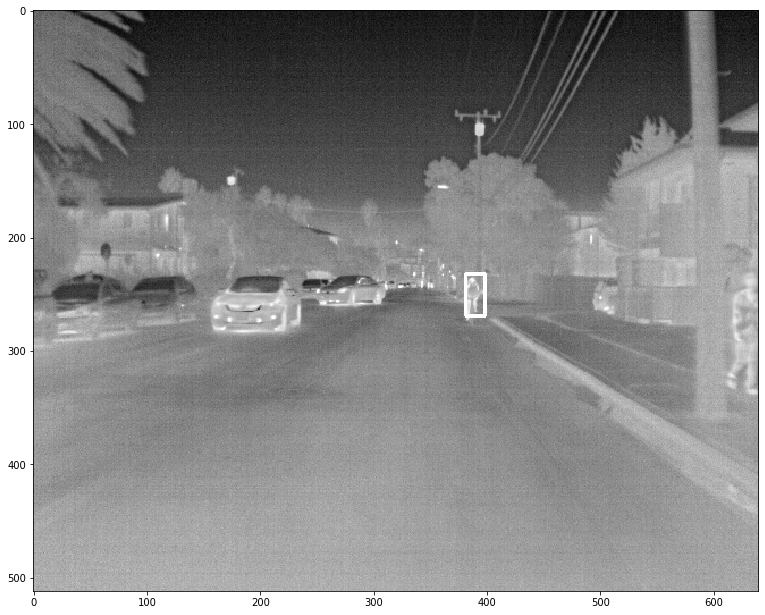

In [57]:
image = cv2.imread(r'C:\Users\admin\Downloads\FLIR\FLIR_ADAS\training\PreviewData\FLIR_07480.jpeg', 0)
cv2.rectangle(image, (381,232), (381+17,232+37), (255,0,0), 2)
ImShow(image)

In [58]:
dataset_path = r'C:\Users\admin\Downloads\FLIR\FLIR_ADAS\validation\PreviewData'
#rgb_path = r'C:\Users\admin\Downloads\FLIR\FLIR_ADAS\training\RGB'
dataset_files = [file for file in glob.glob(dataset_path + "//*.jpeg")]
#rgb_files = [file for file in glob.glob(rgb_path + "//*.jpg")]
night_inds = np.array(list(chain(range(8863, 9017), range(9321, 9669)))) 
night_inds -= night_inds[0]
train_dataset = [dataset_files[i] for i in night_inds]
print(len(train_dataset), train_dataset)

502 ['C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\validation\\PreviewData\\FLIR_08863.jpeg', 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\validation\\PreviewData\\FLIR_08864.jpeg', 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\validation\\PreviewData\\FLIR_08865.jpeg', 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\validation\\PreviewData\\FLIR_08866.jpeg', 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\validation\\PreviewData\\FLIR_08867.jpeg', 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\validation\\PreviewData\\FLIR_08868.jpeg', 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\validation\\PreviewData\\FLIR_08869.jpeg', 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\validation\\PreviewData\\FLIR_08870.jpeg', 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\validation\\PreviewData\\FLIR_08871.jpeg', 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\validation\\PreviewData\\FLIR_08872.jpeg', 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\validation\\PreviewData\\FLIR_08873.jpeg', 'C:\\

In [59]:
night_inds = list(chain(range(8863, 9017), range(9321, 9669)))
train_data = {}
for i in range(len(night_inds)):
    train_data[night_inds[i]-1] = train_dataset[i]
with open('FLIR_val_dataset.json', 'w') as outfile:
    json.dump(train_data, outfile)

In [60]:
train_data

{8862: 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\validation\\PreviewData\\FLIR_08863.jpeg',
 8863: 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\validation\\PreviewData\\FLIR_08864.jpeg',
 8864: 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\validation\\PreviewData\\FLIR_08865.jpeg',
 8865: 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\validation\\PreviewData\\FLIR_08866.jpeg',
 8866: 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\validation\\PreviewData\\FLIR_08867.jpeg',
 8867: 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\validation\\PreviewData\\FLIR_08868.jpeg',
 8868: 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\validation\\PreviewData\\FLIR_08869.jpeg',
 8869: 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\validation\\PreviewData\\FLIR_08870.jpeg',
 8870: 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\validation\\PreviewData\\FLIR_08871.jpeg',
 8871: 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\validation\\PreviewData\\FLIR_08872.jpeg',
 8872: 'C:\\Users\\admin\\Down

In [61]:
ann_path = r'C:\Users\admin\Downloads\FLIR\FLIR_ADAS\validation\Annotations'
ann_dataset = [ann_path + file[-16:-5] + '.json' for file in train_dataset]
ann_data = []
for file in ann_dataset:
    ann_sample = []
    with open(file, "r") as read_file:
        data = json.load(read_file)
        for ann in data['annotation']:
            if ann['category_id'] == str(1):
                ann_sample.append(ann['bbox'])
    ann_data.append(ann_sample)
print(len(ann_data), ann_data)

502 [[[580, 206, 34, 75], [609, 207, 30, 116]], [[369, 193, 74, 126], [488, 192, 49, 134], [544, 200, 32, 104], [522, 198, 31, 95]], [[224, 210, 34, 101], [189, 202, 54, 114], [312, 202, 71, 123], [386, 206, 24, 97], [408, 204, 23, 100], [440, 209, 40, 96], [431, 204, 14, 20], [442, 205, 14, 22], [478, 202, 12, 59]], [[474, 204, 22, 70], [450, 203, 14, 62], [428, 203, 26, 69], [348, 204, 53, 102], [298, 206, 29, 100], [326, 280, 15, 24], [207, 204, 66, 116], [112, 218, 45, 95], [84, 203, 35, 110]], [[473, 202, 28, 75], [446, 201, 17, 59], [433, 200, 21, 74], [269, 204, 52, 102], [214, 203, 36, 104], [131, 200, 60, 118], [32, 213, 34, 98], [2, 204, 36, 108]], [[57, 203, 56, 114], [139, 209, 38, 99], [188, 207, 52, 100], [422, 200, 33, 83], [462, 195, 14, 69], [467, 196, 29, 82]], [[6, 208, 39, 104], [67, 213, 29, 92], [86, 211, 37, 96], [125, 208, 43, 96], [379, 198, 38, 91], [421, 205, 24, 79], [453, 201, 30, 82]], [[16, 214, 30, 88], [47, 211, 36, 94], [77, 210, 28, 92], [326, 200, 38

In [62]:
data = {}
for i in range(len(ann_data)):
    data[night_inds[i]-1] = ann_data[i]
with open('FLIR_val_groundtruth.json', 'w') as outfile:
    json.dump(data, outfile)

In [63]:
data

{8862: [[580, 206, 34, 75], [609, 207, 30, 116]],
 8863: [[369, 193, 74, 126],
  [488, 192, 49, 134],
  [544, 200, 32, 104],
  [522, 198, 31, 95]],
 8864: [[224, 210, 34, 101],
  [189, 202, 54, 114],
  [312, 202, 71, 123],
  [386, 206, 24, 97],
  [408, 204, 23, 100],
  [440, 209, 40, 96],
  [431, 204, 14, 20],
  [442, 205, 14, 22],
  [478, 202, 12, 59]],
 8865: [[474, 204, 22, 70],
  [450, 203, 14, 62],
  [428, 203, 26, 69],
  [348, 204, 53, 102],
  [298, 206, 29, 100],
  [326, 280, 15, 24],
  [207, 204, 66, 116],
  [112, 218, 45, 95],
  [84, 203, 35, 110]],
 8866: [[473, 202, 28, 75],
  [446, 201, 17, 59],
  [433, 200, 21, 74],
  [269, 204, 52, 102],
  [214, 203, 36, 104],
  [131, 200, 60, 118],
  [32, 213, 34, 98],
  [2, 204, 36, 108]],
 8867: [[57, 203, 56, 114],
  [139, 209, 38, 99],
  [188, 207, 52, 100],
  [422, 200, 33, 83],
  [462, 195, 14, 69],
  [467, 196, 29, 82]],
 8868: [[6, 208, 39, 104],
  [67, 213, 29, 92],
  [86, 211, 37, 96],
  [125, 208, 43, 96],
  [379, 198, 38, 91]

In [5]:
video_path = r'C:\Users\admin\Google\HumanDetection\Data\video.mp4'
video_data_path = r'C:\Users\admin\Google\HumanDetection\Data\frames/'

cap = cv2.VideoCapture(video_path)

first_frame = 1000
current_frame = -1

while(cap.isOpened()):
    current_frame += 1
    
    ret, frame = cap.read()
    
    if (current_frame < first_frame):
        continue
    
    if (current_frame == 1500):
        break
        
    cv2.imwrite(video_data_path + 'video_frame_' + str(current_frame) + '.jpeg', frame)
    
    cv2.imshow('frame', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [6]:
video_train_dataset = [file for file in glob.glob(video_data_path + "*.jpeg")]

In [11]:
video_train_data = {}
for i in range(1000, 1500):
    video_train_data[i] = video_train_dataset[i-1000]
with open('video_dataset.json', 'w') as outfile:
    json.dump(video_train_data, outfile)

In [12]:
video_train_data

{1000: 'C:\\Users\\admin\\Google\\HumanDetection\\Data\\frames\\video_frame_1000.jpeg',
 1001: 'C:\\Users\\admin\\Google\\HumanDetection\\Data\\frames\\video_frame_1001.jpeg',
 1002: 'C:\\Users\\admin\\Google\\HumanDetection\\Data\\frames\\video_frame_1002.jpeg',
 1003: 'C:\\Users\\admin\\Google\\HumanDetection\\Data\\frames\\video_frame_1003.jpeg',
 1004: 'C:\\Users\\admin\\Google\\HumanDetection\\Data\\frames\\video_frame_1004.jpeg',
 1005: 'C:\\Users\\admin\\Google\\HumanDetection\\Data\\frames\\video_frame_1005.jpeg',
 1006: 'C:\\Users\\admin\\Google\\HumanDetection\\Data\\frames\\video_frame_1006.jpeg',
 1007: 'C:\\Users\\admin\\Google\\HumanDetection\\Data\\frames\\video_frame_1007.jpeg',
 1008: 'C:\\Users\\admin\\Google\\HumanDetection\\Data\\frames\\video_frame_1008.jpeg',
 1009: 'C:\\Users\\admin\\Google\\HumanDetection\\Data\\frames\\video_frame_1009.jpeg',
 1010: 'C:\\Users\\admin\\Google\\HumanDetection\\Data\\frames\\video_frame_1010.jpeg',
 1011: 'C:\\Users\\admin\\Google